# Plot spatial data for 20CR

In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

# 20CR data

In [18]:
# define path where netcdsf of temperature are stored
path = '/g/data/w48/kb6999/20CR_data_for_plots/'

## open netcdfs here!!

## Figures

In [23]:
# eruption dates
e_date = ['1883-08','1902-10', '1963-03', '1982-04', '1991-06']
e_post6mon = ['1884-02', '1903-04', '1963-09', '1982-10', '1991-12']
e_post12mon = ['1884-08','1903-10', '1964-03', '1983-04', '1992-06']
e_post24mon = ['1885-08','1904-10', '1965-03', '1984-04', '1993-06']

In [24]:
# dates and title for eruption and 3 times after
K_dates = [e_date[0], e_post6mon[0], e_post12mon[0], e_post24mon[0]]
title_label = ['Eruption month, ', '6 months post-eruption, ', '12 months post-eruption, ', '24 months post-eruption, ']

In [25]:
titles=[]
for i,vals in enumerate(K_dates):
    t = title_label[i] + K_dates[i]
    titles.append(t)
titles

['Eruption month, 1883-08',
 '6 months post-eruption, 1884-02',
 '12 months post-eruption, 1884-08',
 '24 months post-eruption, 1885-08']

In [26]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

In [27]:
# set the mod max for the colour bars
cmax_tmp = 0.8
cmax_pr = 0.8

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.62101656, -0.52101654, -0.42101657, -0.32101655, -0.22101656,
        -0.12101656, -0.02101656,  0.07898344,  0.17898344,  0.27898344,
         0.37898344], dtype=float32),
 <BarContainer object of 10 artists>)

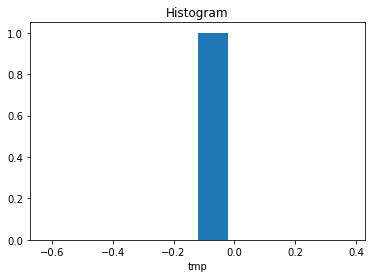

In [29]:
mmm_mon_Glob.sel(time=K_dates[0]).tmp.plot()

AttributeError: 'Rectangle' object has no property 'add_colorbar'

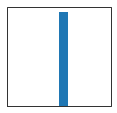

In [28]:
# plot of global monthly member mean temperature at 4 discrete time periods (not averaged)
fig = fplot.spatial_plot(2, 2, mmm_mon_Glob.tmp, cmax_tmp, K_dates, titles, 'RdBu_r', f'Temperature anomaly [{deg}C]', 1)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_Glob.png', dpi=300)# , bbox_inches='tight') # bbox=tight removes lat labels when figure saves

In [ ]:
# plot of Aus monthly member mean temperature
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Aus.tmp, cmax_tmp, K_dates, titles, 'RdBu_r', f'Temperature anomaly [{deg}C]', 1)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_Aus.png', dpi=300, bbox_inches='tight')

In [ ]:
# plot of global monthly member mean precipitation
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Glob.pr, cmax_pr, K_dates, titles, 'BrBG','Precipitation anomaly [mm/day]', 1)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_pr_Glob.png', dpi=300)#, bbox_inches='tight')

In [ ]:
# plot of Aus monthly member mean precipitation
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Aus.pr, cmax_pr, K_dates, titles, 'BrBG','Precipitation anomaly [mm/day]', 1)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

plt.savefig('R_spatial_pr_Aus.png', dpi=300, bbox_inches='tight')